# **Random Forest IT-3**

In [ ]:
# ============================
# NOTEBOOK 2 - MODELO CON MENOS VARIABLES
# ============================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Cargar datos
df = pd.read_csv("df_preprocesado_final.csv")
print("Shape del dataframe:", df.shape)

# 2. Variable objetivo
target = "IARD_global"
y_simple = df[target]

# 3. Definir subconjunto de variables explicativas (ajusta nombres si algo difiere)
cols_base = [
    "2_edad",
    "11_años_experiencia_docente",
    "12_horas_pedagogicas_semanales",
    "13_promedio_estudiantes_curso"
]

# Dummies de tipo de establecimiento
cols_estab = [c for c in df.columns if c.startswith("5_tipo_establecimiento_")]

# Dummies de asignatura principal
cols_asig  = [c for c in df.columns if c.startswith("10_asignatura_principal_")]

cols_simple = cols_base + cols_estab + cols_asig

print("\nNúmero de variables seleccionadas:", len(cols_simple))
print("Ejemplo de columnas seleccionadas:", cols_simple[:15])

# 4. Construir X_simple
X_simple = df[cols_simple]

# 5. Limpiar NaN
mask_simple = X_simple.notna().all(axis=1) & y_simple.notna()
X_simple = X_simple[mask_simple]
y_simple = y_simple[mask_simple]

print("\nFilas usadas tras limpiar NaN:", X_simple.shape[0])

# 6. Train-test split
Xtr_s, Xte_s, ytr_s, yte_s = train_test_split(
    X_simple, y_simple,
    test_size=0.3,
    random_state=42
)

print("Tamaño train:", Xtr_s.shape[0], " - Tamaño test:", Xte_s.shape[0])

# 7. Función de métricas
def resumen_metricas(y_true, y_pred, nombre=""):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"== {nombre} ==")
    print("R²   :", round(r2, 3))
    print("MAE  :", round(mae, 2))
    print("RMSE :", round(rmse, 2))
    print()

# 8. Modelo de Random Forest regularizado sobre el subconjunto
rf_simple = RandomForestRegressor(
    n_estimators=300,
    max_depth=7,
    min_samples_leaf=5,
    min_samples_split=10,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_simple.fit(Xtr_s, ytr_s)

# 9. Evaluar desempeño
ytr_pred_s = rf_simple.predict(Xtr_s)
yte_pred_s = rf_simple.predict(Xte_s)

print("\n=== Modelo con menos variables (subset teórico) ===")
resumen_metricas(ytr_s, ytr_pred_s, "Train")
resumen_metricas(yte_s, yte_pred_s, "Test")

# 10. Importancia de variables
importances_s = rf_simple.feature_importances_
feature_names_s = X_simple.columns

fi_simple = pd.DataFrame({
    "variable": feature_names_s,
    "importancia": importances_s
}).sort_values("importancia", ascending=False)

print("\nTop 15 variables más importantes (modelo subset):")
print(fi_simple.head(15))


Shape del dataframe: (260, 164)

Número de variables seleccionadas: 66
Ejemplo de columnas seleccionadas: ['2_edad', '11_años_experiencia_docente', '12_horas_pedagogicas_semanales', '13_promedio_estudiantes_curso', '5_tipo_establecimiento_Administración Delegada', '5_tipo_establecimiento_Administración delegada', '5_tipo_establecimiento_Corporación', '5_tipo_establecimiento_De administración delegada', '5_tipo_establecimiento_Municipal', '5_tipo_establecimiento_Particular Pagado', '5_tipo_establecimiento_Particular Subvencionado', '5_tipo_establecimiento_SLEP', '5_tipo_establecimiento_corporacion', '10_asignatura_principal_Apoyo en el aula a los estudiantes de integración escolar', '10_asignatura_principal_Artes Visuales']

Filas usadas tras limpiar NaN: 260
Tamaño train: 182  - Tamaño test: 78

=== Modelo con menos variables (subset teórico) ===
== Train ==
R²   : 0.088
MAE  : 9.58
RMSE : 11.72

== Test ==
R²   : 0.039
MAE  : 9.72
RMSE : 11.48


Top 15 variables más importantes (model

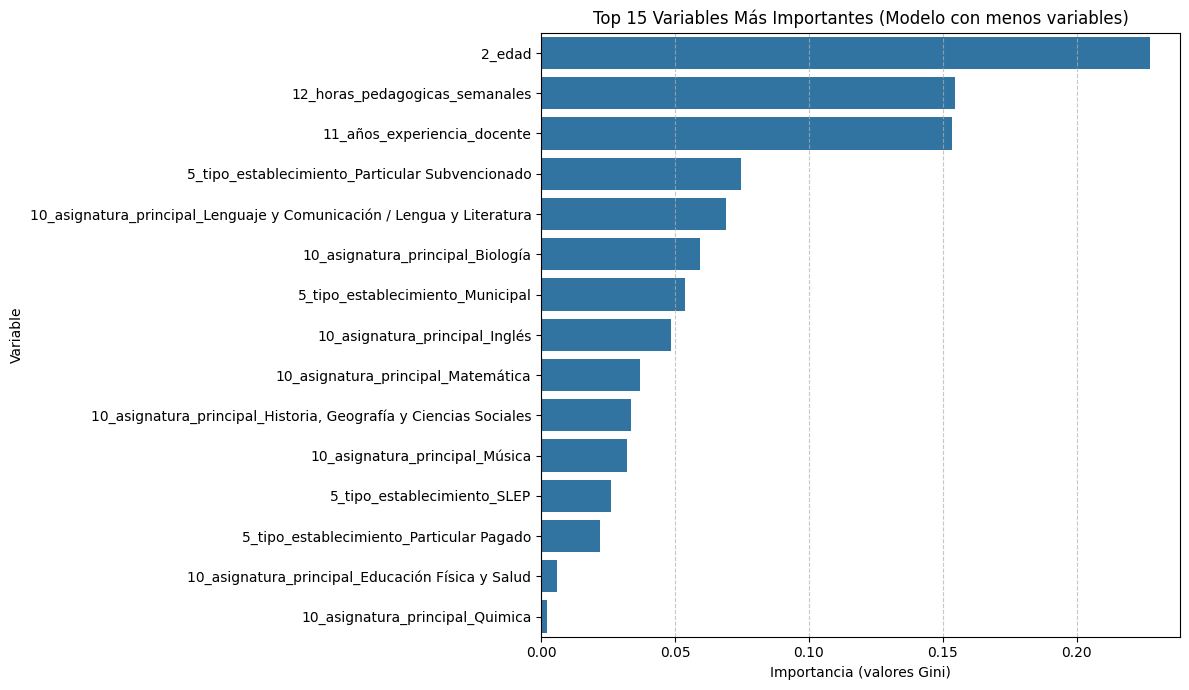

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que fi_simple esté definido
if 'fi_simple' in locals():
    plt.figure(figsize=(12, 7))
    sns.barplot(x='importancia', y='variable', data=fi_simple.head(15))
    plt.title('Top 15 Variables Más Importantes (Modelo con menos variables)')
    plt.xlabel('Importancia (valores Gini)')
    plt.ylabel('Variable')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Error: La variable 'fi_simple' no se encontró. Por favor, asegúrate de ejecutar el código anterior.")

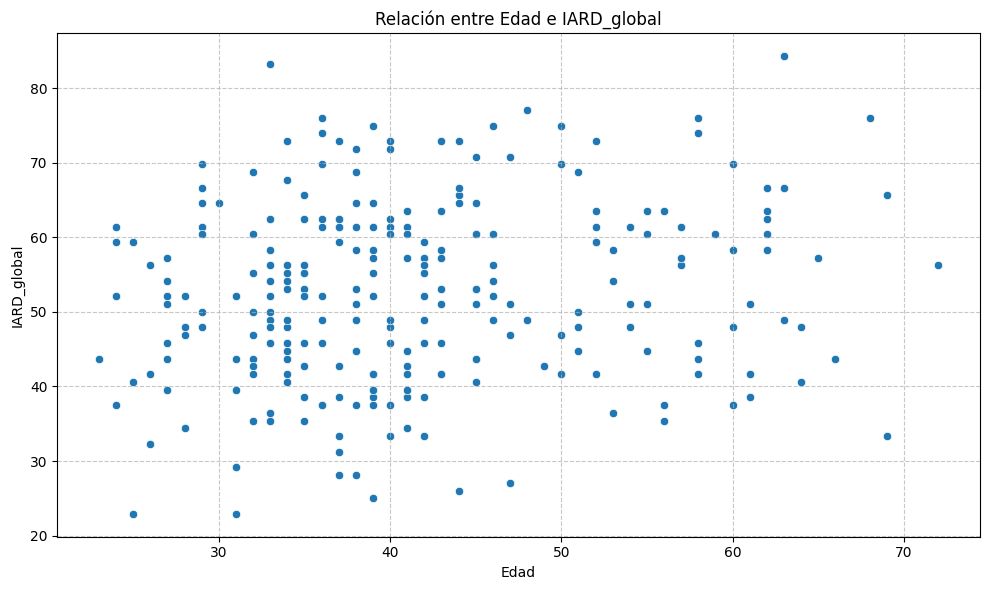

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='2_edad', y='IARD_global', data=df)
plt.title('Relación entre Edad e IARD_global')
plt.xlabel('Edad')
plt.ylabel('IARD_global')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()